### Settings & imports

In [2]:
import masserstein
from masserstein import Spectrum, NMRSpectrum
from masserstein import estimate_proportions

from matplotlib import pyplot as plt

import numpy as np

import pandas as pd

### Experiment data

Insert names of consecutive components into the list below. In our example they are pinene and benzyl benzoate.

In [3]:
components_names = ['Pinene', 'Benzyl benzoate']

Insert number of protons in consecutive components into the list below. In our example they are equal to 16 and 12 for pinene and benzyl benzoate, respectively.

In [4]:
protons_list = [16, 12]

### Loading the data

Insert name of file containing mixture below. Note that you need to choose an appropriate delimiter. For example, if you export csv file from Mnova, load it via mix = np.loadtxt(filename, delimiter='\t', usecols=[0,1]).

In [5]:
filename = 'preprocessed_mix.csv'
mix = np.loadtxt(filename, delimiter=',')
#If you are using file exported from Mnova, comment line above and uncomment line below.
#mix = np.loadtxt(filename, delimiter='\t', usecols=[0,1])

In [6]:
how_many_components = len(components_names)
names = ['comp' + str(i) for i in range(how_many_components)]

Insert name of files containing consecutive components below. Again, you need to choose an appropriate delimiter. For example, if you export csv file from Mnova, load it via np.loadtxt(filename, delimiter='\t', usecols=[0,1])

In [7]:
files_with_components = ['preprocessed_comp0.csv', 'preprocessed_comp1.csv']

In [8]:
spectra = []
for i in range(how_many_components):
    filename = files_with_components[i]
    spectra.append(np.loadtxt(filename, delimiter=','))
    #If you are using file exported from Mnova, comment line above and uncomment line below.
    #spectra.append(np.loadtxt(filename, delimiter='\t', usecols=[0,1]))

In [9]:
spectra2 = []
names = []
for i in range(len(spectra)):
    spectra2.append(NMRSpectrum(confs=list(zip(spectra[i][:,0], spectra[i][:,1])), 
                                protons=protons_list[i]))
    names.append('comp'+str(i))

spectra = spectra2
del(spectra2)
mix = NMRSpectrum(confs=list(zip(mix[:,0], mix[:,1])))

In [10]:
mix.trim_negative_intensities()
mix.normalize()
for sp in spectra:
    sp.trim_negative_intensities()
    sp.normalize()

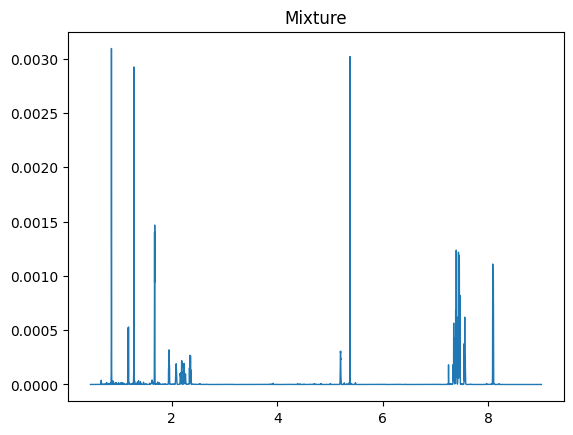

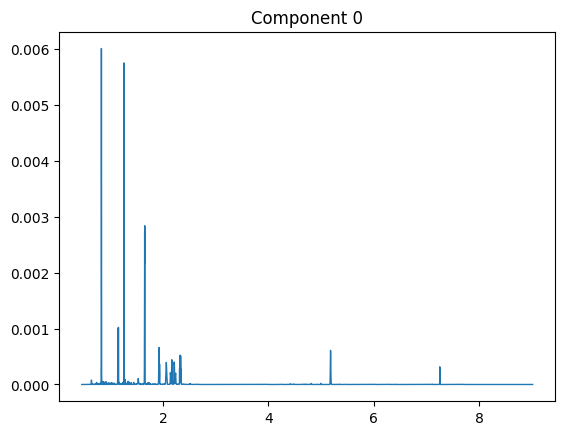

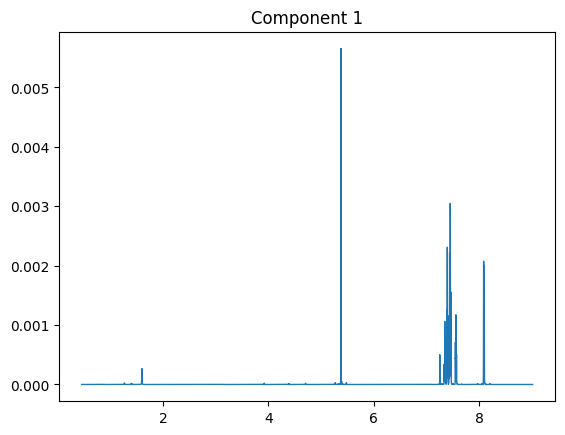

In [11]:
plt.title('Mixture')
mix.plot(profile=True)
for i, sp in enumerate(spectra):
    plt.title('Component '+str(i))
    sp.plot(profile=True)

### Estimation with default parameters

Set values of kappa_mixture and kappa_components parameters. Default values are 0.25 and 0.22, respectively.

In [12]:
kappa_mixture = 0.25
kappa_components = 0.22

Get the proportions of components in mixture by running line below. In case of problems, run help(estimate_proportions).

In [13]:
estimation_result = estimate_proportions(mix, spectra,
                                        MTD=kappa_mixture, 
                                        MTD_th=kappa_components,
                                        verbose=True)

Initial filtering of formulas: 100%|██████████████| 2/2 [00:00<00:00, 36.50it/s]


Removed theoretical spectra due to no matching experimental peaks: []
Envelope bounds: [(0.457009, 9.01304, 0), (0.457009, 9.01304, 1)]


Computing chunks: 100%|████████████████████████| 2/2 [00:00<00:00, 21902.37it/s]


Number of chunks: 1
ChunkIDs: [0, 0]
Chunk bounds: [(0.207009, 9.26304)]


Splitting the experimental spectrum into chunks: 70340it [00:00, 1910662.73it/s]


Ion currents in chunks: [0.9999999999999998]


Deconvolving chunks:   0%|                                | 0/1 [00:00<?, ?it/s]/home/basia/.local/lib/python3.10/site-packages/pulp/pulp.py:1352: UserWarning: Spaces are not permitted in the name. Converted to '_'
  warnings.warn("Spaces are not permitted in the name. Converted to '_'")


Deconvolving chunk 0
Set parameter Username
Academic license - for non-commercial use only - expires 2023-11-10
Gurobi Optimizer version 10.0.0 build v10.0.0rc2 (linux64)

CPU model: 11th Gen Intel(R) Core(TM) i7-11850H @ 2.50GHz, instruction set [SSE2|AVX|AVX2|AVX512]
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads

Optimize a model with 281359 rows, 70343 columns and 700269 nonzeros
Model fingerprint: 0x9e433d85
Coefficient statistics:
  Matrix range     [6e-12, 1e+00]
  Objective range  [7e-12, 1e+00]
  Bounds range     [1e-04, 1e-04]
  RHS range        [1e-04, 2e-01]
Presolve removed 78091 rows and 0 columns
Presolve time: 28.65s
Presolved: 70343 rows, 281358 columns, 700268 nonzeros

Concurrent LP optimizer: primal simplex, dual simplex, and barrier
Showing barrier log only...

Ordering time: 0.01s

Barrier statistics:
 Dense cols : 3
 AA' NZ     : 3.486e+05
 Factor NZ  : 1.442e+06 (roughly 150 MB of memory)
 Factor Ops : 3.415e+07 (less than 1 second

Deconvolving chunks: 100%|████████████████████████| 1/1 [00:55<00:00, 55.51s/it]

Chunk %i deconvolution status: Optimal
Signal proportion in experimental spectrum: 0.997286032762
Noise proportion in experimental spectrum: 0.002713967238
Total explanation: 1.0
Noise proportion in combination of theoretical spectra: 0.009471922476


Run cell below to see the result of estimation.

In [14]:
estimation_result

{'proportions': [0.39307158181939095, 0.6069284181806092],
 'Wasserstein distance': 0.01479572918829436}

You can compare the result with experiment 6 in Supplementary Information to our paper.

#### Saving results of estimation with default parameters

In [15]:
res_con = pd.DataFrame(np.array(estimation_result['proportions']).reshape(1,-1), 
             columns = components_names)
res_con

,Pinene,Benzyl benzoate
0,0.393072,0.606928


If you wish, you can save the results in .csv file. To do so, uncomment line below.

In [16]:
#res_con.to_csv('results.csv')